<a href="https://colab.research.google.com/github/AdeOktavianus/MNIST-playground/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from numpy import mean
from numpy import std
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold
import keras
import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

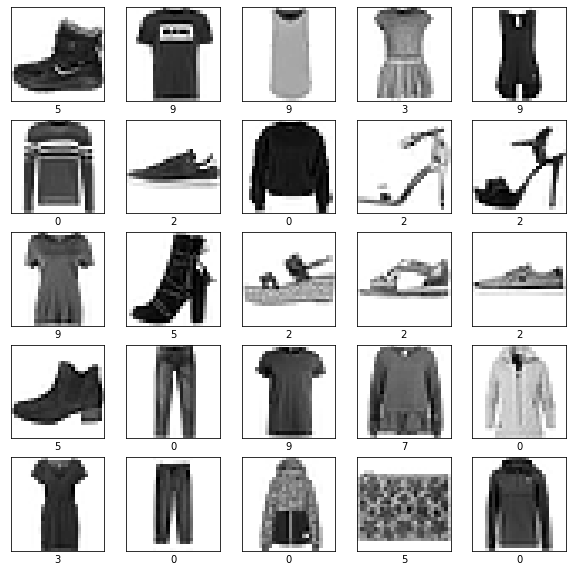

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i], cmap=plt.cm.binary)
    plt.xlabel(ytrain[ytrain[i]])
plt.show()

In [ ]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
xtrain=xtrain.reshape((xtrain.shape[0],28,28,1))
xtest=xtest.reshape((xtest.shape[0],28,28,1))

In [ ]:
xtrain_normalize=xtrain.astype('float32')
xtest_normalize=xtest.astype('float32')

In [ ]:
xtrain_normalize=xtrain_normalize/255
xtest_normalize=xtest_normalize/255

In [ ]:
ytest=to_categorical(ytest)
ytrain=to_categorical(ytrain)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='HeUniform'))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='HeUniform'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu', kernel_initializer='HeUniform'))
model.add(Dense(10, activation='softmax'))
opt=tf.optimizers.Adam(learning_rate=0.01)
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=opt,metrics=['accuracy'])

In [ ]:
fashion_mnist_model=model.fit(xtrain_normalize,ytrain, batch_size=256, epochs=10, validation_data=(xtest_normalize,ytest))

Epoch 1/10
235/235 [==============================] - 137s 580ms/step - loss: 0.6986 - accuracy: 0.8343 - val_loss: 0.3330 - val_accuracy: 0.8787
Epoch 2/10
235/235 [==============================] - 136s 581ms/step - loss: 0.3104 - accuracy: 0.8849 - val_loss: 0.3043 - val_accuracy: 0.8918
Epoch 3/10
235/235 [==============================] - 137s 582ms/step - loss: 0.2691 - accuracy: 0.8990 - val_loss: 0.2948 - val_accuracy: 0.8900
Epoch 4/10
235/235 [==============================] - 136s 579ms/step - loss: 0.2424 - accuracy: 0.9079 - val_loss: 0.2838 - val_accuracy: 0.8976
Epoch 5/10
235/235 [==============================] - 136s 577ms/step - loss: 0.2229 - accuracy: 0.9157 - val_loss: 0.2766 - val_accuracy: 0.9039
Epoch 6/10
235/235 [==============================] - 136s 579ms/step - loss: 0.2034 - accuracy: 0.9226 - val_loss: 0.2684 - val_accuracy: 0.9077
Epoch 7/10
235/235 [==============================] - 136s 578ms/step - loss: 0.1950 - accuracy: 0.9261 - val_loss: 0.2678 -

In [ ]:
score=model.evaluate(xtest_normalize,ytest,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2854727506637573
Test accuracy: 0.9085999727249146
